In [42]:
import librosa
import librosa.display
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [43]:
y, sr = librosa.load(r"Good Times Bad Times - Led Zeppelin.flac")

In [53]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

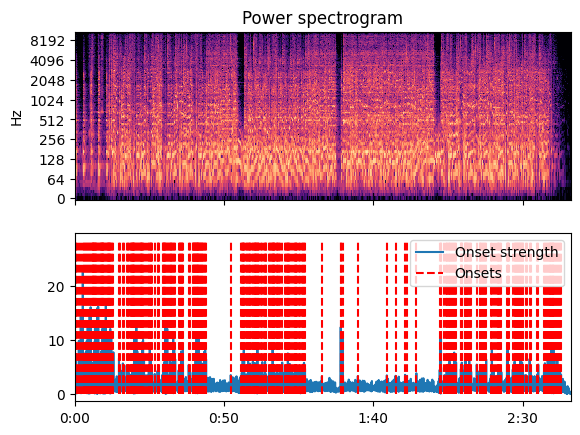

In [55]:
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows = 2, sharex = True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref = np.max), x_axis = 'time', y_axis = 'log', ax = ax[0])
ax[0].set(title = 'Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label = 'Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color = 'r', alpha = 1, linestyle = '--', label = 'Onsets')
ax[1].legend()

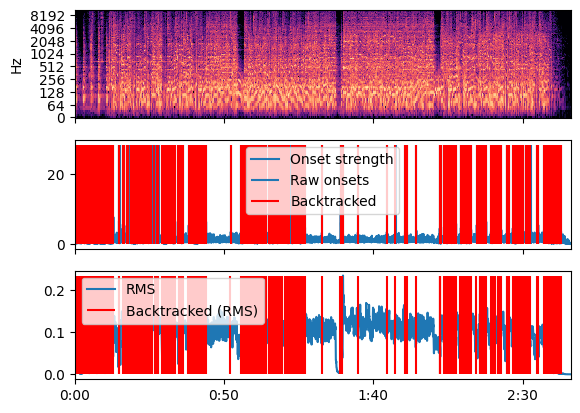

In [56]:
onset_raw = librosa.onset.onset_detect(onset_envelope = o_env, backtrack = False)
onset_bt = librosa.onset.onset_backtrack(onset_raw, o_env)

S = np.abs(librosa.stft(y = y))
rms = librosa.feature.rms(S = S)
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])
fig, ax = plt.subplots(nrows = 3, sharex = True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time', ax = ax[0])
ax[0].label_outer()
ax[1].plot(times, o_env, label = 'Onset strength')
ax[1].vlines(librosa.frames_to_time(onset_raw), 0, o_env.max(), label = 'Raw onsets')
ax[1].vlines(librosa.frames_to_time(onset_bt), 0, o_env.max(), label = 'Backtracked', color = 'r')
ax[1].legend()
ax[1].label_outer()
ax[2].plot(times, rms[0], label = 'RMS')
ax[2].vlines(librosa.frames_to_time(onset_bt_rms), 0, rms.max(), label='Backtracked (RMS)', color = 'r')
ax[2].legend()

[Text(0, 0.5, 'Normalized Strength'), []]

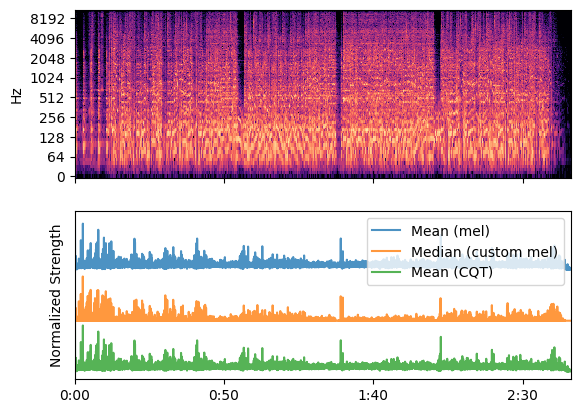

In [65]:
S = np.abs(librosa.stft(y = y))
rms = librosa.feature.rms(S = S)
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])
fig, ax = plt.subplots(nrows = 2, sharex = True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time', ax = ax[0])
ax[0].label_outer()
ax[1].plot(times, 2 + o_env / o_env.max(), alpha = 0.8, label = 'Mean (mel)')
o_env = librosa.onset.onset_strength(y = y, sr = sr, aggregate = np.median, fmax = 8000, n_mels = 256)
ax[1].plot(times, 1 + o_env / o_env.max(), alpha = 0.8, label = 'Median (custom mel)')
C = np.abs(librosa.cqt(y = y, sr = sr))
o_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref = np.max))
ax[1].plot(times, onset_env / o_env.max(), alpha = 0.8, label = 'Mean (CQT)')
ax[1].legend()
ax[1].set(ylabel = 'Normalized Strength', yticks = [])

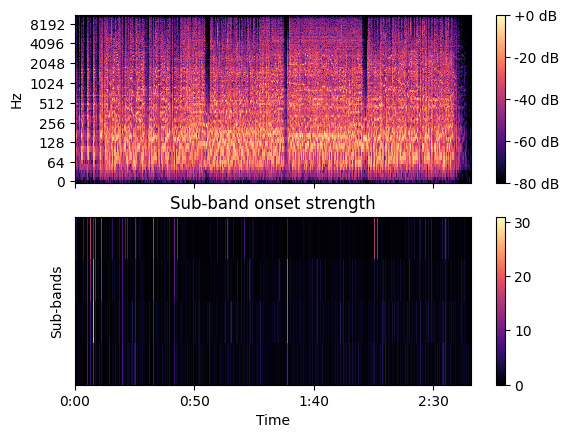

In [68]:
S = np.abs(librosa.stft(y = y))
rms = librosa.feature.rms(S = S)
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])
fig, ax = plt.subplots(nrows = 2, sharex = True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time', ax = ax[0])
img1 = librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
ax[0].label_outer()
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")

onset_subbands = librosa.onset.onset_strength_multi(y=y, sr=sr, channels = [0, 32, 64, 96, 128])
img2 = librosa.display.specshow(onset_subbands, x_axis='time', ax=ax[1])
ax[1].set(ylabel='Sub-bands', title='Sub-band onset strength')
fig.colorbar(img2, ax=[ax[1]])

In [69]:
tempo, beats = librosa.beat.beat_track(y = y, sr = sr)
print("Tempo:", tempo)
print("Beats:", '\n', beats)

Tempo: 95.703125
Beats: 
 [   3   32   60   88  117  146  174  202  230  258  285  312  340  368
  394  421  449  475  500  527  558  586  613  639  666  695  723  751
  779  808  835  861  889  917  945  972 1000 1029 1057 1083 1111 1139
 1168 1196 1224 1253 1280 1307 1335 1365 1393 1421 1449 1478 1506 1534
 1561 1590 1618 1645 1674 1703 1731 1758 1785 1814 1841 1868 1895 1924
 1952 1979 2007 2035 2062 2089 2116 2143 2170 2197 2225 2251 2279 2306
 2334 2362 2390 2417 2445 2474 2501 2528 2555 2582 2609 2635 2663 2691
 2719 2746 2773 2801 2828 2855 2883 2911 2938 2966 2993 3021 3048 3075
 3102 3131 3158 3185 3213 3240 3268 3295 3322 3350 3378 3405 3432 3459
 3483 3509 3537 3565 3592 3619 3646 3674 3700 3728 3756 3783 3810 3837
 3867 3898 3926 3953 3980 4007 4033 4059 4084 4111 4138 4166 4194 4221
 4248 4274 4300 4326 4352 4378 4406 4434 4462 4490 4519 4547 4575 4602
 4628 4656 4683 4710 4737 4765 4793 4820 4847 4874 4902 4928 4955 4982
 5009 5037 5064 5091 5118 5145 5172 5199 5226 5253 

In [70]:
librosa.frames_to_time(beats, sr=sr)

array([6.96598639e-02, 7.43038549e-01, 1.39319728e+00, 2.04335601e+00,
       2.71673469e+00, 3.39011338e+00, 4.04027211e+00, 4.69043084e+00,
       5.34058957e+00, 5.99074830e+00, 6.61768707e+00, 7.24462585e+00,
       7.89478458e+00, 8.54494331e+00, 9.14866213e+00, 9.77560091e+00,
       1.04257596e+01, 1.10294785e+01, 1.16099773e+01, 1.22369161e+01,
       1.29567347e+01, 1.36068934e+01, 1.42338322e+01, 1.48375510e+01,
       1.54644898e+01, 1.61378685e+01, 1.67880272e+01, 1.74381859e+01,
       1.80883447e+01, 1.87617234e+01, 1.93886621e+01, 1.99923810e+01,
       2.06425397e+01, 2.12926984e+01, 2.19428571e+01, 2.25697959e+01,
       2.32199546e+01, 2.38933333e+01, 2.45434921e+01, 2.51472109e+01,
       2.57973696e+01, 2.64475283e+01, 2.71209070e+01, 2.77710658e+01,
       2.84212245e+01, 2.90946032e+01, 2.97215420e+01, 3.03484807e+01,
       3.09986395e+01, 3.16952381e+01, 3.23453968e+01, 3.29955556e+01,
       3.36457143e+01, 3.43190930e+01, 3.49692517e+01, 3.56194104e+01,
      

In [75]:
o_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate = np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope = onset_env,sr = sr)
print("Tempo:", tempo)
print("Beats:", '\n', beats)

Tempo: 123.046875
Beats: 
 [   4   23   41   60   80   99  118  142  166  189  210  231  251  272
  294  317  340  361  381  403  422  443  464  485  504  528  548  568
  587  607  628  648  667  689  710  730  751  771  791  809  829  848
  870  890  911  932  953  973  997 1019 1041 1061 1083 1105 1125 1147
 1168 1189 1210 1232 1253 1276 1298 1317 1336 1357 1379 1400 1422 1442
 1461 1480 1500 1521 1542 1562 1583 1605 1625 1646 1666 1686 1705 1724
 1744 1766 1786 1807 1828 1848 1869 1889 1910 1931 1952 1974 1996 2017
 2037 2058 2080 2101 2122 2143 2166 2188 2210 2231 2251 2272 2293 2314
 2334 2355 2376 2396 2417 2439 2460 2481 2501 2522 2543 2563 2583 2603
 2623 2644 2664 2685 2706 2726 2746 2767 2788 2810 2834 2856 2878 2898
 2919 2938 2958 2980 3001 3021 3041 3062 3083 3103 3123 3144 3164 3185
 3205 3226 3246 3267 3288 3309 3329 3349 3370 3390 3411 3432 3453 3472
 3492 3513 3533 3552 3572 3592 3613 3634 3654 3674 3694 3714 3735 3755
 3776 3796 3816 3838 3857 3878 3899 3920 3940 3960

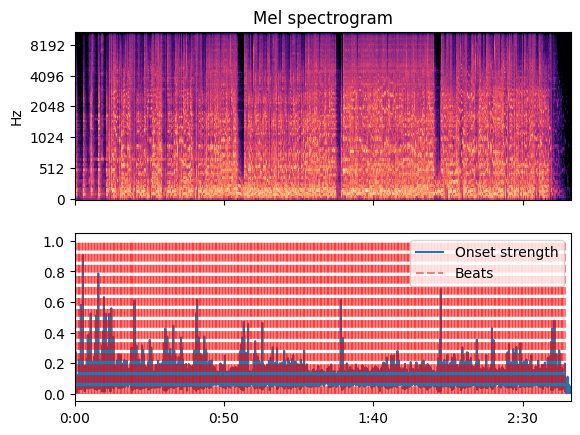

In [82]:
hop_length = 512
fig, ax = plt.subplots(nrows = 2, sharex = True)
times = librosa.times_like(o_env, sr = sr, hop_length = hop_length)
M = librosa.feature.melspectrogram(y = y, sr = sr, hop_length = hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max), y_axis='mel', x_axis='time', hop_length=hop_length, ax = ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()